In [25]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
import math

#psi = [1, 0] # Define Psi state |Psi> = |0>
psi = [0, 1]  # Define Psi state |Psi> = |1>

# Define unitary matrix
U = np.matrix([[ 1 , 0 ],
    [ 0 , math.sqrt(4)/2 ]])
#print("U: ", U)
#print("U*: ", U.getH())
#I = U.dot(U.getH())
#print("I: ", I)

# Define rotation angles
theta_1 = math.pi/4
theta_2 = math.pi/4

# Define single qubit unitary operations V1 and V2
# Those are custom controlled unitary gates (quantum circuit)
# Define V1
v1 = np.identity(2)
qcv1 = QuantumCircuit(1)
qcv1.unitary(v1, 0)
customV1 = qcv1.to_gate().control(1)

# Define V2
v2 = np.identity(2)
qcv2 = QuantumCircuit(1)
qcv2.unitary(v2, 0)
customV2 = qcv2.to_gate().control(1)

# Define the quantum circuit using to quantum registers and 2 classical registers
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# Initialize Q[0]
qc.initialize(psi, q[0])

# Rotation part of the circuit
qc.unitary(U, q[0])
qc.x(q[0])
qc.cry(theta_1, q[0], q[1])
qc.x(q[0])
qc.cry(theta_2, q[0], q[1])

# Custom unitaries part of the circuit
# V1
qc.x(q[1])
qc.append(customV1, [1, 0])
# V2
qc.x(q[1])
qc.append(customV2, [1, 0])

# Measure mapping quantum bits to classical registers
qc.measure(q, c)

qc.draw()

┌─────────────────┐┌─────────┐┌───┐           ┌───┐                »
q135_0: ┤ initialize(0,1) ├┤ unitary ├┤ X ├─────■─────┤ X ├─────■──────────»
        └─────────────────┘└─────────┘└───┘┌────┴────┐└───┘┌────┴────┐┌───┐»
q135_1: ───────────────────────────────────┤ RY(π/4) ├─────┤ RY(π/4) ├┤ X ├»
                                           └─────────┘     └─────────┘└───┘»
 c10: 2/═══════════════════════════════════════════════════════════════════»
                                                                           »
«        ┌────────────┐     ┌────────────┐┌─┐   
«q135_0: ┤ circuit475 ├─────┤ circuit482 ├┤M├───
«        └─────┬──────┘┌───┐└─────┬──────┘└╥┘┌─┐
«q135_1: ──────■───────┤ X ├──────■────────╫─┤M├
«                      └───┘               ║ └╥┘
« c10: 2/══════════════════════════════════╩══╩═
«                                          0  1

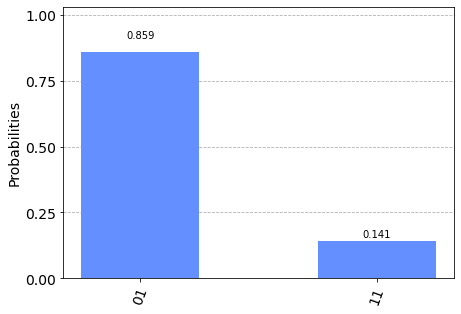

In [26]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

# Get counts
histo_counts = result_sim.get_counts(qc)
plot_histogram(histo_counts)